In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.2.0-rc1


In [0]:
from tensorflow.keras.layers import LSTM, Input, Dense, Flatten, GlobalMaxPooling1D, GRU, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [4]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [5]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [0]:
series = df['close'].values.reshape(-1, 1)

In [0]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [8]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(1249, 10, 1) (1249,)


In [0]:
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(optimizer=Adam(lr=0.1),
              loss='mse')

In [10]:
r = model.fit(X[:-N//2], Y[:-N//2],
              validation_data=(X[-N//2:], Y[-N//2:]),
              epochs=80)

Epoch 1/80
20/20 [==============================] - 0s 22ms/step - loss: 0.1092 - val_loss: 0.0684
Epoch 2/80
20/20 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0421
Epoch 3/80
20/20 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.0318
Epoch 4/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.0205
Epoch 5/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0057 - val_loss: 0.0188
Epoch 6/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0198
Epoch 7/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0202
Epoch 8/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0318
Epoch 9/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 0.0310
Epoch 10/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0402
Epoch 11/80
20/20 

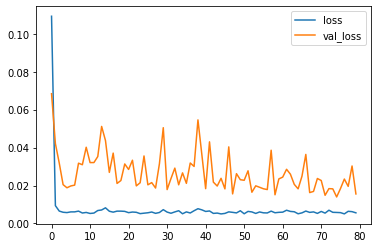

In [11]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(1249, 1)


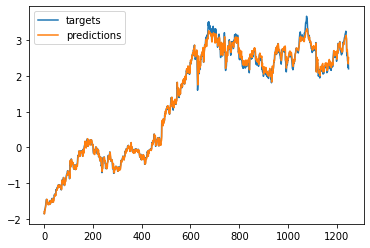

In [12]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

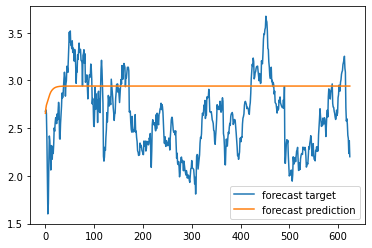

In [13]:
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [0]:
df['PrevClose'] = df['close'].shift(1)

In [15]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [0]:
df['Return'] = (df['close']-df['PrevClose'])/df['PrevClose']

In [17]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


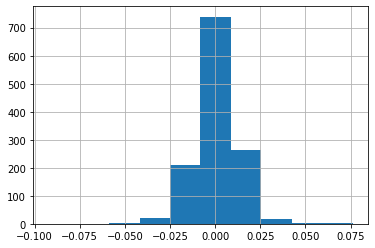

In [18]:
df['Return'].hist()

In [0]:
series = df['Return'].values[1:].reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [20]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(1248, 10, 1) (1248,)


In [0]:
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(optimizer=Adam(lr=0.1),
              loss='mse')

In [22]:
r = model.fit(X[:-N//2], Y[:-N//2],
              validation_data=(X[-N//2:], Y[-N//2:]),
              epochs=80)

Epoch 1/80
20/20 [==============================] - 0s 20ms/step - loss: 1.0027 - val_loss: 1.2194
Epoch 2/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9947 - val_loss: 1.1525
Epoch 3/80
20/20 [==============================] - 0s 5ms/step - loss: 0.9748 - val_loss: 1.1553
Epoch 4/80
20/20 [==============================] - 0s 6ms/step - loss: 1.0531 - val_loss: 1.1649
Epoch 5/80
20/20 [==============================] - 0s 6ms/step - loss: 1.0059 - val_loss: 1.1522
Epoch 6/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9907 - val_loss: 1.1657
Epoch 7/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9663 - val_loss: 1.2572
Epoch 8/80
20/20 [==============================] - 0s 6ms/step - loss: 1.0052 - val_loss: 1.2127
Epoch 9/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9680 - val_loss: 1.1860
Epoch 10/80
20/20 [==============================] - 0s 6ms/step - loss: 1.0006 - val_loss: 1.1580
Epoch 11/80
20/20 

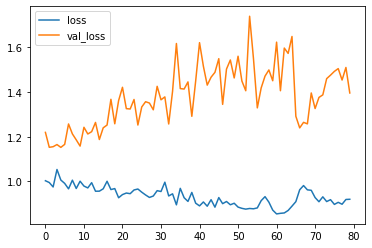

In [23]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(1248, 1)


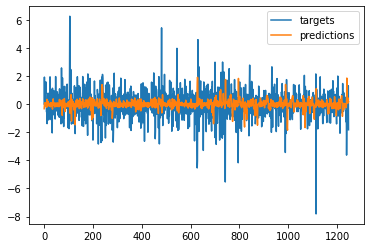

In [24]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

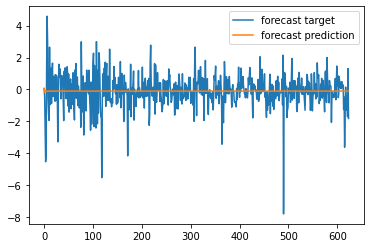

In [25]:
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [0]:
 input_data = df[['open', 'high', 'low', 'close', 'volume']].values
 targets = df['Return'].values

In [0]:
T = 10
D = input_data.shape[1]
N = len(input_data) - T

In [0]:
Ntrain = len(input_data) *2 //3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T ])
input_data = scaler.transform(input_data)

In [0]:
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)
for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T]>0)

In [0]:
X_test = np.zeros((N-Ntrain, T, D))
Y_test = np.zeros(N-Ntrain)
for u in range(N-Ntrain):
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T]>0)

In [0]:
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer = Adam(lr=0.01),
    metrics=['accuracy']
)

In [32]:
r = model.fit(X_train, Y_train,
              validation_data=(X_test, Y_test),
              epochs=300)


Epoch 1/300
27/27 [==============================] - 0s 18ms/step - loss: 0.7103 - accuracy: 0.4875 - val_loss: 0.7039 - val_accuracy: 0.5122
Epoch 2/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6956 - accuracy: 0.5101 - val_loss: 0.6958 - val_accuracy: 0.5146
Epoch 3/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6967 - accuracy: 0.5042 - val_loss: 0.6997 - val_accuracy: 0.4854
Epoch 4/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5077 - val_loss: 0.7015 - val_accuracy: 0.4854
Epoch 5/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5387 - val_loss: 0.6953 - val_accuracy: 0.4829
Epoch 6/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.5411 - val_loss: 0.6956 - val_accuracy: 0.4951
Epoch 7/300
27/27 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5530 - val_loss: 0.6965 - val_accuracy: 0.5049
Epoch 8/300


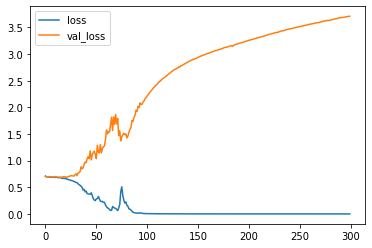

In [33]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

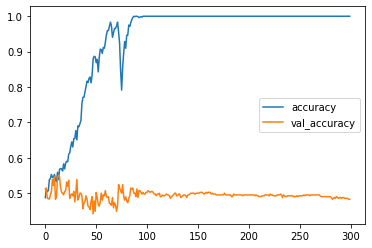

In [34]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()